## ASBD MIDSEM - CED19I027 - N. SREE DHYUTI

In [56]:
# CED19I027 - N. SREE DHYUTI - ASBD MIDSEM

# Import Required Libraries
import pandas as pd
import math
import random
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import openpyxl
from openpyxl.styles import PatternFill
import squarify
import stemgraphic
import plotly.graph_objects as go  
import plotly.express as px
import scipy.stats as stats

**Load Dataset** 

In [57]:
data = pd.read_csv(r"01_District_wise_crimes_committed_IPC_2001_2012.csv")
data

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [58]:
data.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

## About the dataset: 

https://www.kaggle.com/datasets/rajanand/crime-in-india?resource=download

- State/UT - State or Union Territory from where the crime data is recorded
- District - District from where the crime data is recorded
- Year - Year when the crime data is recorded

**Number of Cases of...**

- Murder 
- Attempt to Murder
- Culpable Homicide not amounting to murder 
- Rape 
- Custodial Rape 
- Other Rape
- Kidnapping and abduction 
- Kidnapping and abduction of women & girls 
- Kidnapping and abduction of others 
- Dacoity 
- Preparation and assembly for dacoity
- Robbery
- Burglary
- Theft
- Auto Theft
- Other Theft
- Riots
- Criminal Breach of Trust
- Cheating
- Counterfieting
- Arson
- Hurt/Grevious Hurt
- Dowry Deaths
- Assault on women with intent to outrage her modesty
- Insult to modesty of women
- Cruelty by husband or his relatives
- Importation of girls from foreign countries
- Causing death by negligence
- Other IPC Crimes
- Total IPC Crimes

## Data Preprocessing

1. Selection
- Column named "Custodian Rape" can be dropped as no such cases were observed anywhere
- Column named "Kidnapping and abduction" can be removed as it is just a sum of attribute values of columns "Kidnapping and abduction of women & girls" and "Kidnapping and abduction of others"
- Similarly, "Theft" = "Auto Theft" + "Other Theft" and thus "Theft" can be dropped to save space
- Similarly, columns "Total IPC Crimes" can also be removed. 
- All of this will help reduce storage


In [59]:
all_attributes = list(data.columns)
drop_attributes = ["CUSTODIAL RAPE", "THEFT","KIDNAPPING & ABDUCTION", "TOTAL IPC CRIMES"]

req_attributes = []
for i in all_attributes:
    if i not in drop_attributes:
        req_attributes.append(i)
        
print("After Selection, Attributes being used are:")
for i in req_attributes:
    print(i)
    
data1 = data[req_attributes]

After Selection, Attributes being used are:
STATE/UT
DISTRICT
YEAR
MURDER
ATTEMPT TO MURDER
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER
RAPE
OTHER RAPE
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS
KIDNAPPING AND ABDUCTION OF OTHERS
DACOITY
PREPARATION AND ASSEMBLY FOR DACOITY
ROBBERY
BURGLARY
AUTO THEFT
OTHER THEFT
RIOTS
CRIMINAL BREACH OF TRUST
CHEATING
COUNTERFIETING
ARSON
HURT/GREVIOUS HURT
DOWRY DEATHS
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY
INSULT TO MODESTY OF WOMEN
CRUELTY BY HUSBAND OR HIS RELATIVES
IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES
CAUSING DEATH BY NEGLIGENCE
OTHER IPC CRIMES


2. Cleaning
- The data has no Null Values or discrepancies
- The rows with totallings can be avoid unnecesary additions in the data

In [60]:
data1.dropna(axis=0)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,OTHER RAPE,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,50,30,16,...,1,30,1131,16,149,34,175,0,181,1518
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,23,30,23,...,8,69,1543,7,118,24,154,0,270,754
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,27,34,25,...,9,38,2088,14,112,83,186,0,404,1262
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,20,20,5,...,2,23,795,17,126,38,57,0,233,1181
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,23,26,23,...,3,41,1244,12,109,58,247,0,431,2313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,0,3,3,0,1,0,1,0,0,32
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,0,3,3,0,1,0,1,0,0,32
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,6,2,0,...,1,1,186,0,2,0,1,0,44,392
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,7,14,3,...,5,20,632,0,7,2,5,0,219,1668


In [84]:
dropp = []
for i in data1.index:
    if data1["DISTRICT"][i] == "TOTAL":
        dropp.append(i)
data1 = data1.drop(dropp) 
data1

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,OTHER RAPE,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,50,30,16,...,1,30,1131,16,149,34,175,0,181,1518
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,23,30,23,...,8,69,1543,7,118,24,154,0,270,754
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,27,34,25,...,9,38,2088,14,112,83,186,0,404,1262
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,20,20,5,...,2,23,795,17,126,38,57,0,233,1181
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,23,26,23,...,3,41,1244,12,109,58,247,0,431,2313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,DELHI UT,STF,2012,120,1,26,109,109,220,48,...,2,22,865,30,178,31,1027,0,238,1
9011,DELHI UT,WEST,2012,52,37,10,79,79,256,198,...,2,18,227,18,53,6,327,0,292,1144
9012,LAKSHADWEEP,LAKSHADWEEP,2012,120,154,26,109,109,220,48,...,18,3,3,30,1,31,1,0,238,32
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,6,2,48,...,1,1,186,30,2,31,1,0,44,392


3. Normalization



In [62]:
# # Z-Score Normalization

# for i in range(3, len(data1.columns)):
#     data = np.array(data1[data1.columns[i]])
#     data1[data1.columns[i]] = stats.zscore(data1["MURDER"])
# # data = np.array(data1["MURDER"])
# # print("\n Using Scipy:")
# # print(stats.zscore(data1["MURDER"]))


4. Data Transformation

In [85]:
def binning_median(param):
    num_bins = 250
#     data2 = data1.sort_values(by=[param])
    bin_size = math.ceil(data1.shape[0]/num_bins)
    
    bins = []
    binn = []
    for i in data1.index:  
        binn.append(int(data1[str(param)][i]))
        if(len(binn) == bin_size):
            bins.append(binn)
            binn = []

    cnt = 0
    for i in data1.index:
        if (cnt//bin_size) != 0:
            bin_mean = statistics.median(bins[(cnt//bin_size)-1])
        else:
            bin_mean = statistics.median(bins[(cnt//bin_size)])
        cnt += 1
        if data1[param][i] == 0:
            data1.at[i, param] = bin_mean
    return 

for i in range(3, len(data1.columns)):
    binning_median(data1.columns[i])


In [86]:
print("After data preprocessing, data is as follows:")
data1

After data preprocessing, data is as follows:


,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,OTHER RAPE,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,50,30,16,...,1,30,1131,16,149,34,175,0,181,1518
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,23,30,23,...,8,69,1543,7,118,24,154,0,270,754
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,27,34,25,...,9,38,2088,14,112,83,186,0,404,1262
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,20,20,5,...,2,23,795,17,126,38,57,0,233,1181
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,23,26,23,...,3,41,1244,12,109,58,247,0,431,2313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,DELHI UT,STF,2012,120,1,26,109,109,220,48,...,2,22,865,30,178,31,1027,0,238,1
9011,DELHI UT,WEST,2012,52,37,10,79,79,256,198,...,2,18,227,18,53,6,327,0,292,1144
9012,LAKSHADWEEP,LAKSHADWEEP,2012,120,154,26,109,109,220,48,...,18,3,3,30,1,31,1,0,238,32
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,6,2,48,...,1,1,186,30,2,31,1,0,44,392


## Descriptive Analytics

In [65]:
# State Wise Data
states = []

for i in data1.index:
    if data1["STATE/UT"][i] not in states:
        states.append(data1["STATE/UT"][i])

murder = [0]*len(states)
atm = [0]*len(states)
homicide = [0]*len(states)
rape = [0]*len(states)
othr_rape = [0]*len(states)
kidnap_girl = [0]*len(states)
kidnap_others = [0]*len(states)
dacoit = [0]*len(states)
prep_dacoit = [0]*len(states)
robbery = [0]*len(states)
burglary = [0]*len(states)
auto_theft = [0]*len(states)
other_theft = [0]*len(states)
riots = [0]*len(states)
trust = [0]*len(states)
cheat = [0]*len(states)
counterfiet = [0]*len(states)
arson = [0]*len(states)
hurt = [0]*len(states)
dowry = [0]*len(states)
assault = [0]*len(states)
insult_women = [0]*len(states)
cruelty = [0]*len(states)
import_women = [0]*len(states)
negligence = [0]*len(states)
other = [0]*len(states)

attributes = [murder, atm, homicide, rape, othr_rape, kidnap_girl, kidnap_others,
              dacoit, prep_dacoit, robbery, burglary, auto_theft, other_theft,
              riots, trust, cheat, counterfiet, arson, hurt, dowry, assault,
              insult_women, cruelty, import_women, negligence, other]

for i in data1.index:
    state = data1["STATE/UT"][i]
    indexx = states.index(state)
    for j in range(len(attributes)):
        attributes[j][indexx] += data1[data1.columns[j+3]][i]      

Bar Graphs

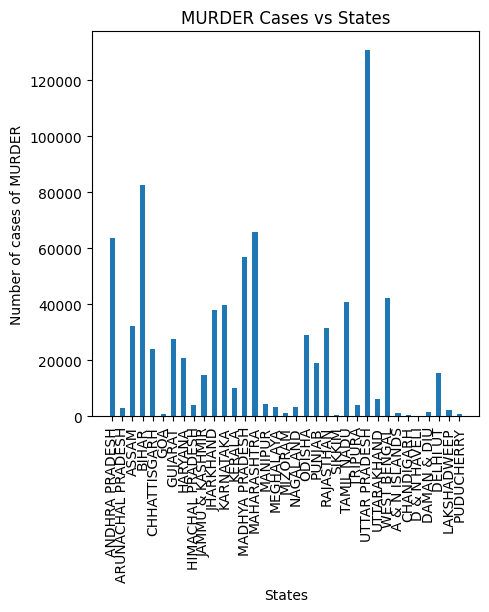

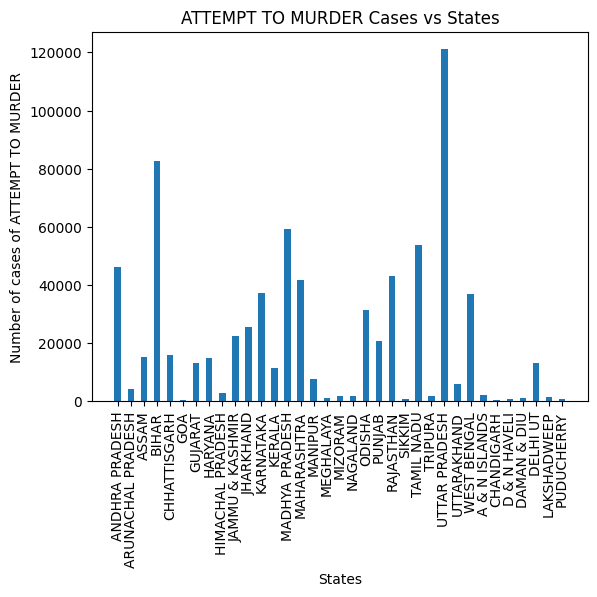

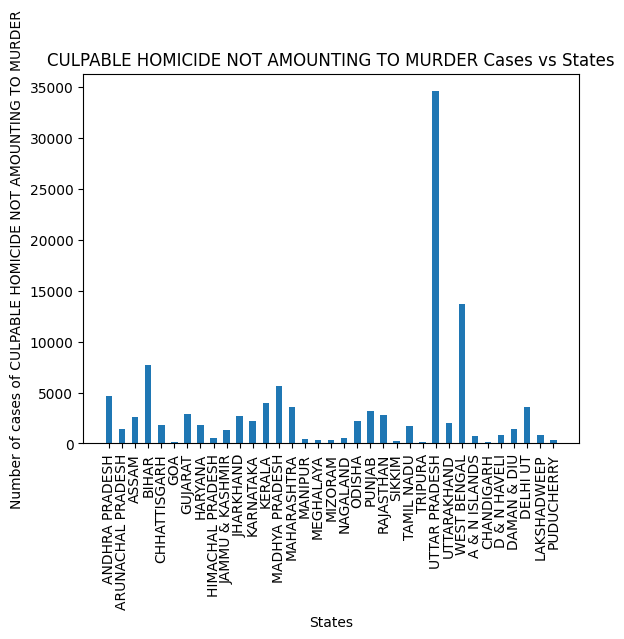

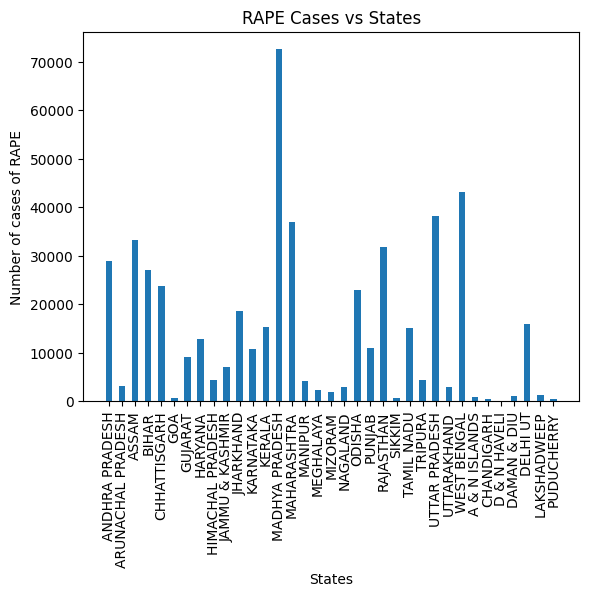

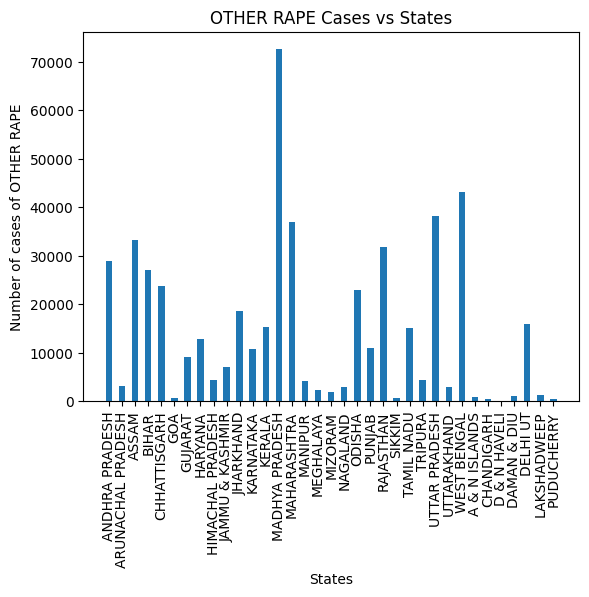

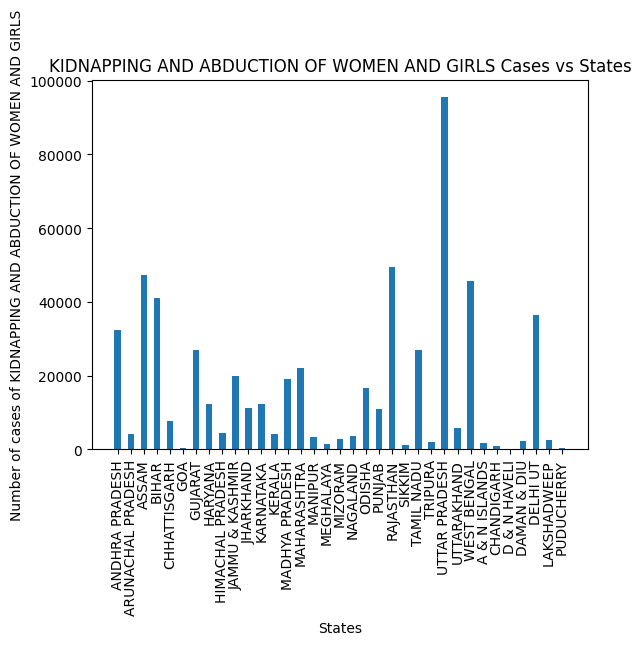

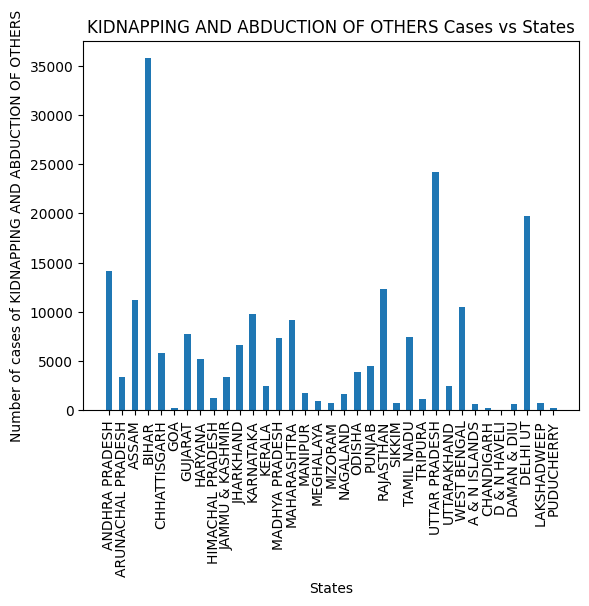

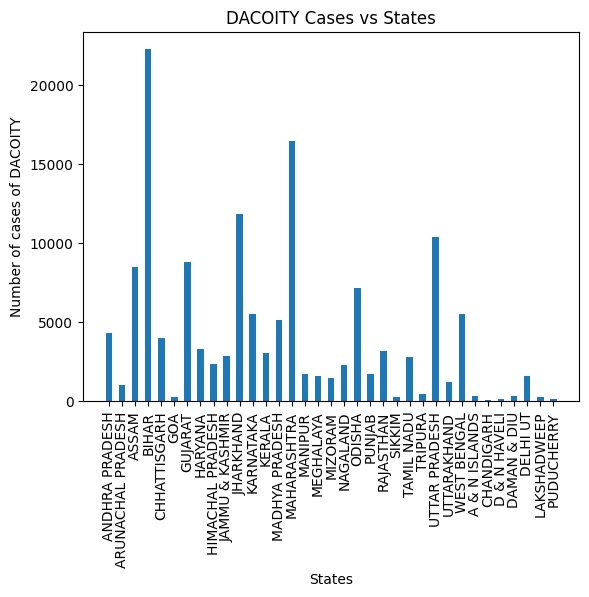

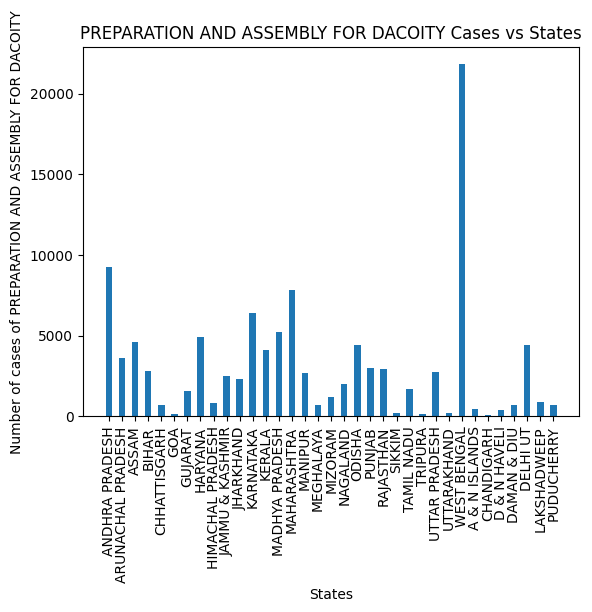

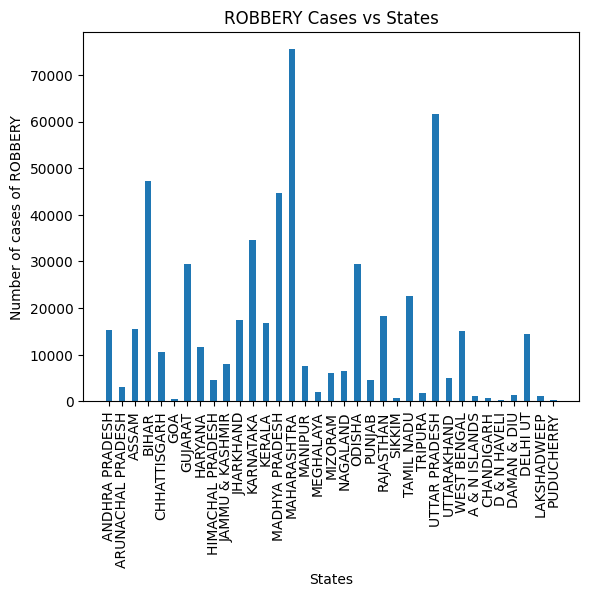

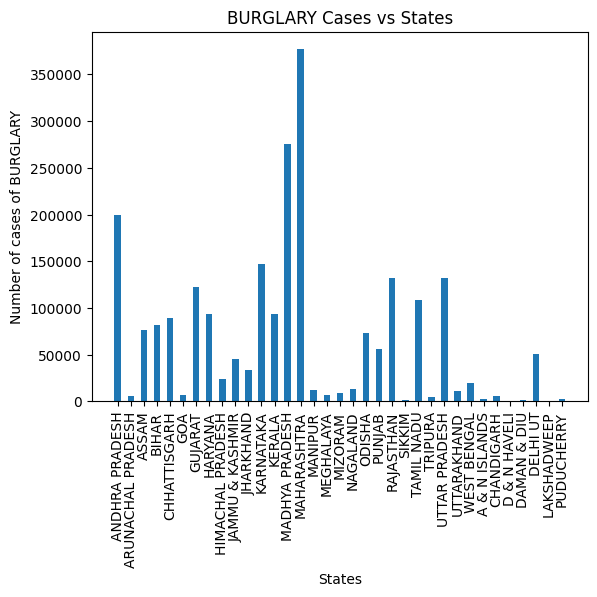

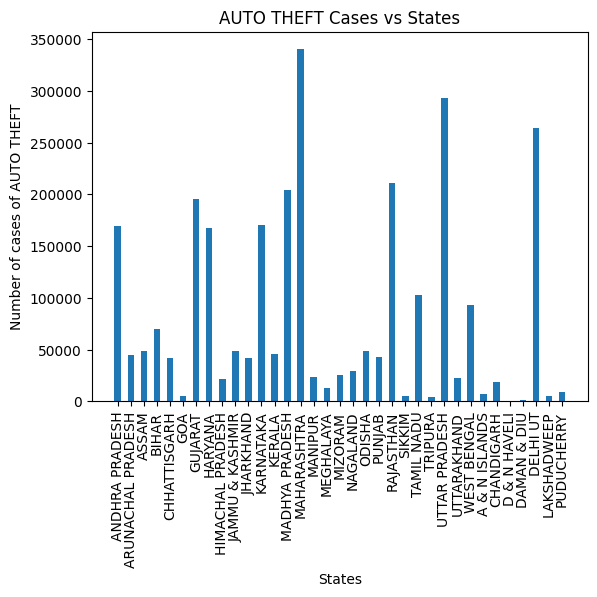

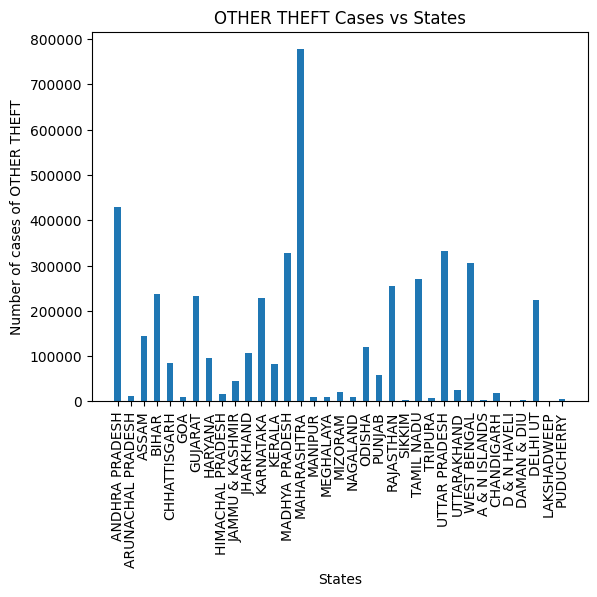

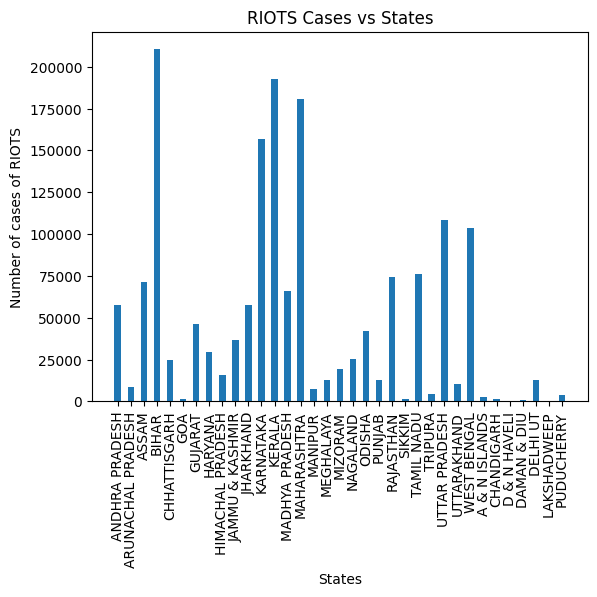

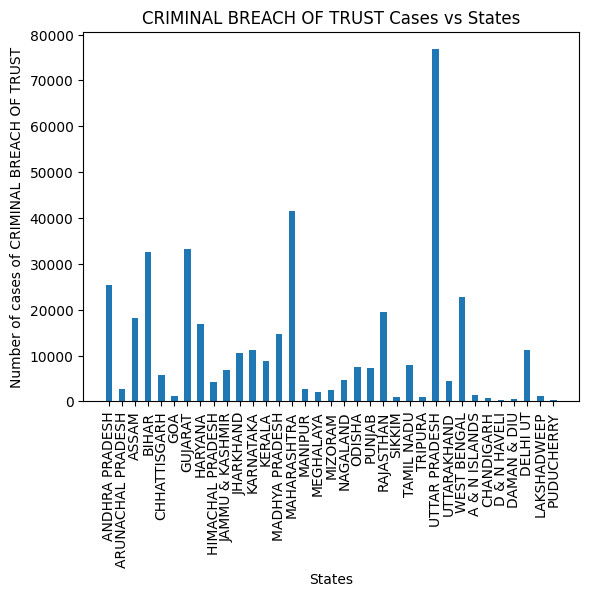

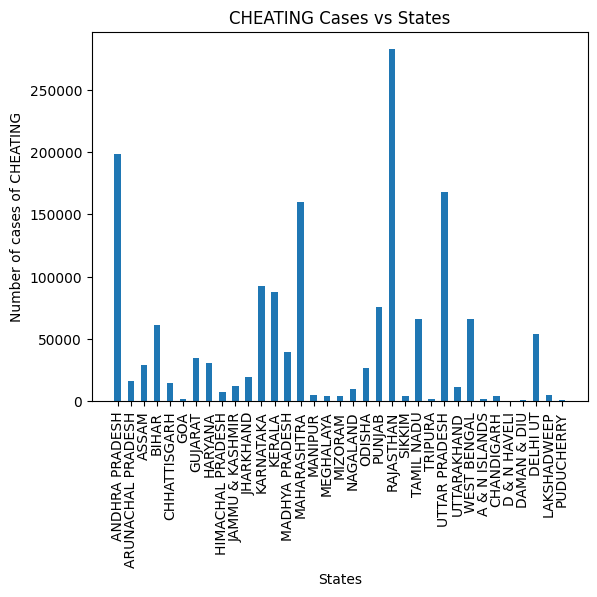

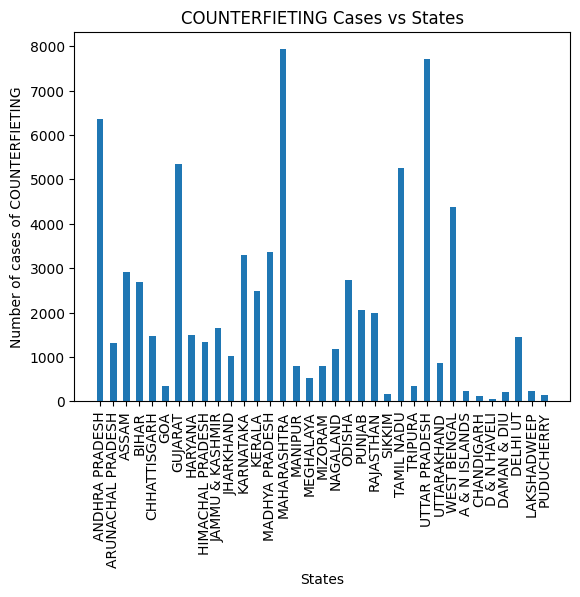

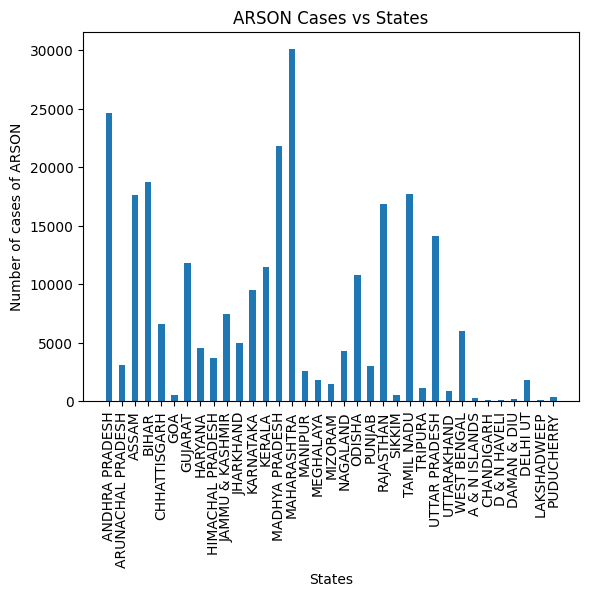

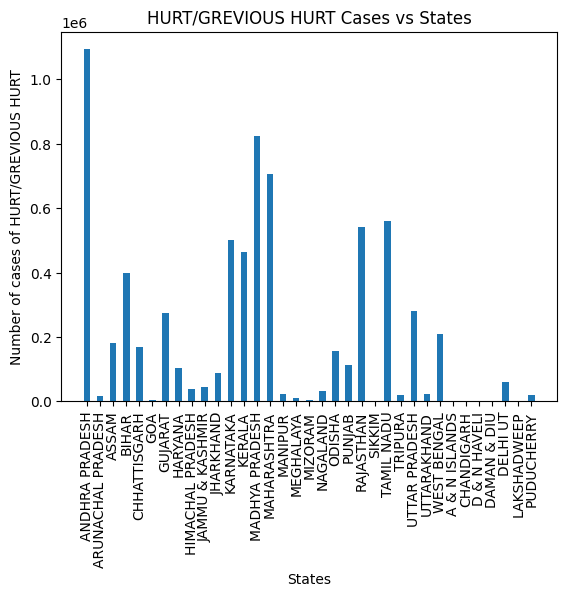

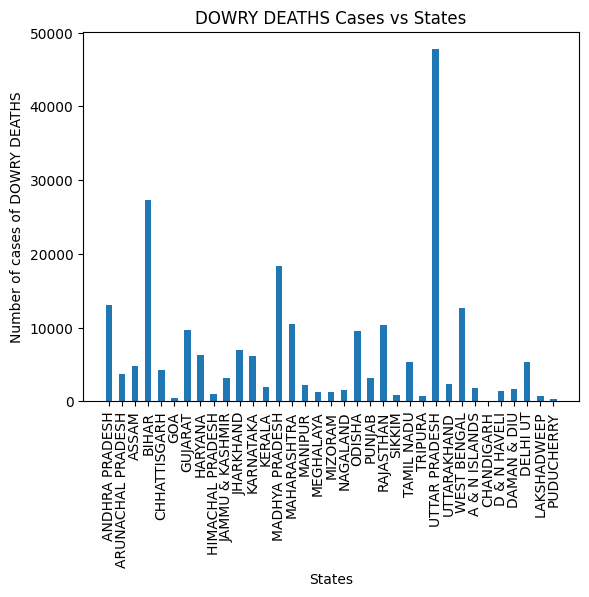

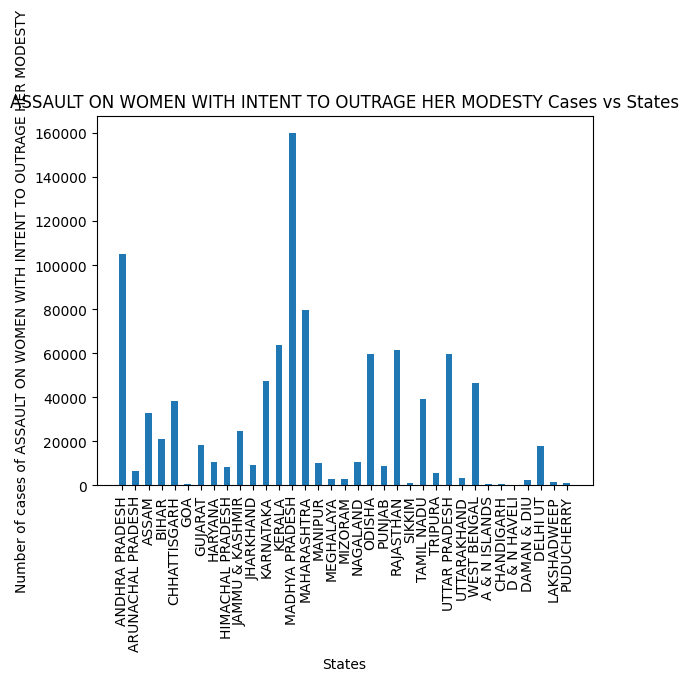

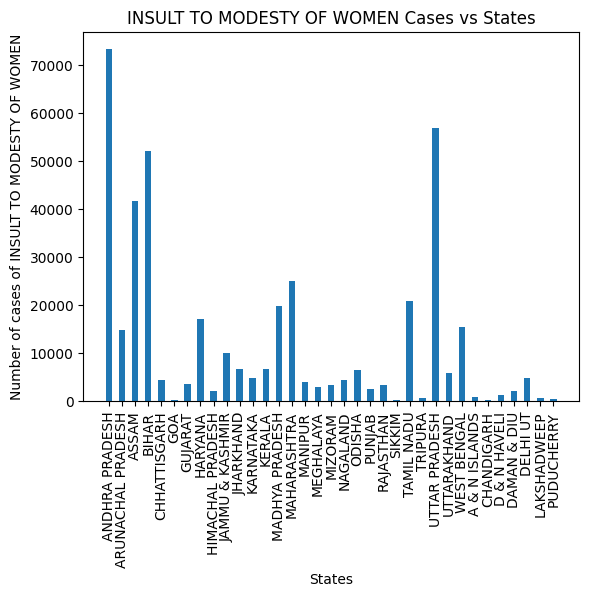

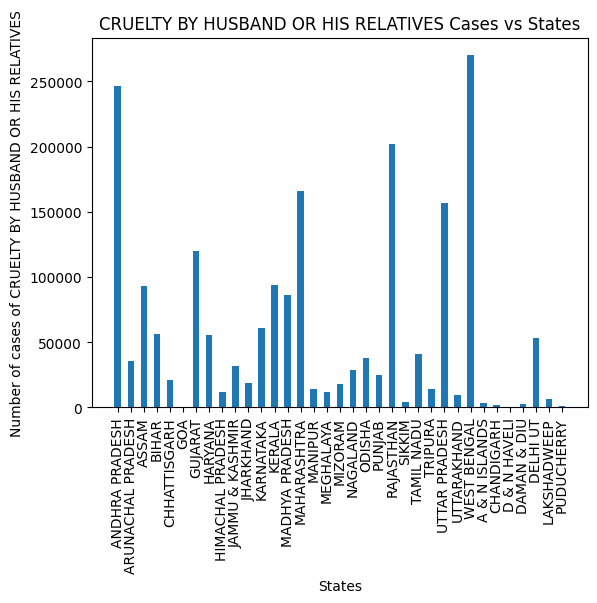

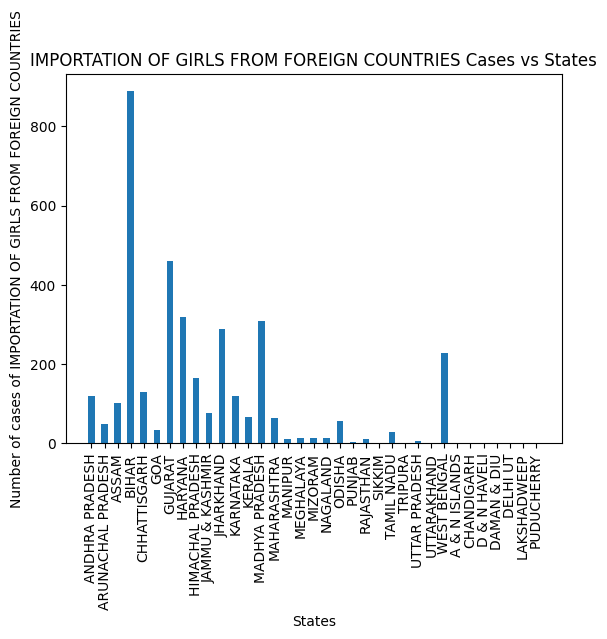

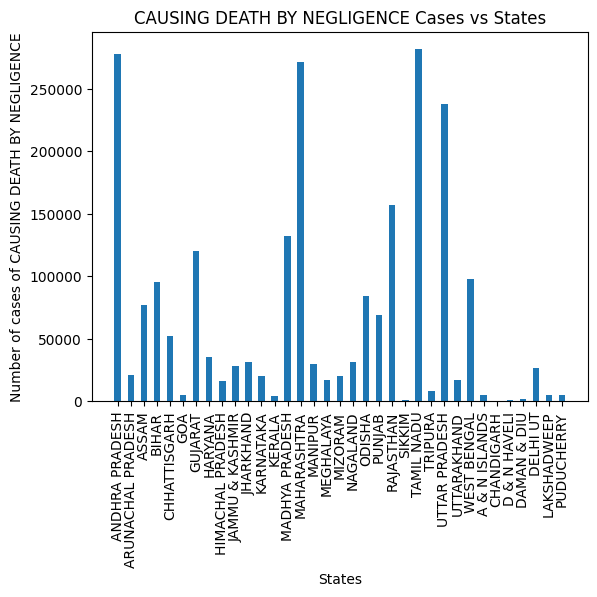

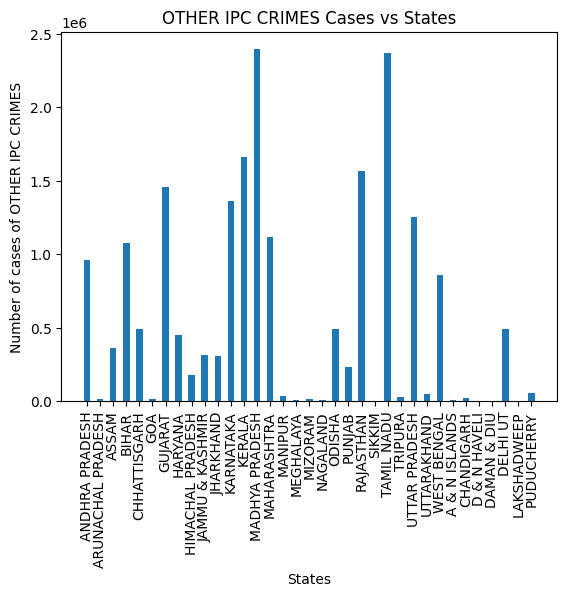

In [87]:
# Bar Chart
fig = plt.figure(figsize = (5, 5))
# creating the bar plot
for i in range(len(attributes)):
    plt.bar(states, attributes[i], width = 0.5)
    plt.xlabel("States")
    plt.ylabel(f"Number of cases of {data1.columns[i+3]}")
    plt.title(f"{data1.columns[i+3]} Cases vs States")
    plt.xticks(rotation=90)
    plt.show()

## Observations:


In [67]:
# Finding the states with Most Frequent Crime:
crimes_states = []
print("Crimes and State where it happens the most\n\n")
for i in range(len(attributes)):
    crime_max = max(attributes[i])
    indexx = attributes[i].index(crime_max)
    print(f"Crime: {data1.columns[i+3]} \nMost Frequently in State: {states[indexx]}\n\n")
    crimes_states.append(states[indexx])

Crimes and State where it happens the most


Crime: MURDER 
Most Frequently in State: UTTAR PRADESH


Crime: ATTEMPT TO MURDER 
Most Frequently in State: UTTAR PRADESH


Crime: CULPABLE HOMICIDE NOT AMOUNTING TO MURDER 
Most Frequently in State: UTTAR PRADESH


Crime: RAPE 
Most Frequently in State: MADHYA PRADESH


Crime: OTHER RAPE 
Most Frequently in State: MADHYA PRADESH


Crime: KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS 
Most Frequently in State: UTTAR PRADESH


Crime: KIDNAPPING AND ABDUCTION OF OTHERS 
Most Frequently in State: BIHAR


Crime: DACOITY 
Most Frequently in State: BIHAR


Crime: PREPARATION AND ASSEMBLY FOR DACOITY 
Most Frequently in State: WEST BENGAL


Crime: ROBBERY 
Most Frequently in State: MAHARASHTRA


Crime: BURGLARY 
Most Frequently in State: MAHARASHTRA


Crime: AUTO THEFT 
Most Frequently in State: MAHARASHTRA


Crime: OTHER THEFT 
Most Frequently in State: MAHARASHTRA


Crime: RIOTS 
Most Frequently in State: BIHAR


Crime: CRIMINAL BREACH OF TRUST 
M

Pie Chart

States with maximum Crimes in Decreasing Order:
['UTTAR PRADESH', 'MAHARASHTRA', 'MADHYA PRADESH', 'BIHAR', 'WEST BENGAL', 'ANDHRA PRADESH', 'TAMIL NADU', 'RAJASTHAN']


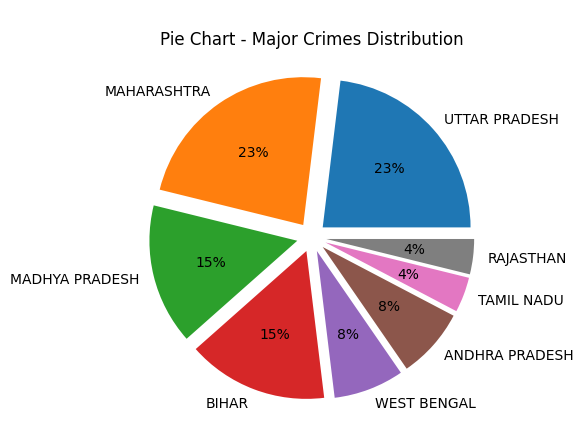

In [69]:
check = list(set(crimes_states))
print("States with maximum Crimes in Decreasing Order:")

stat = [0]*len(check)
for i in crimes_states:
    ind = check.index(i)
    stat[ind] += 1

sortedd = [x for _, x in sorted(zip(stat, check))]

print(list(reversed(sortedd)))

sort_sorted = [x for _, x in sorted(zip(stat, stat))]
# plotting data on chart
explode = [0.1]*len(sortedd)
plt.pie(list(reversed(sort_sorted)), labels=list(reversed(sortedd)), explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.title("\nPie Chart - Major Crimes Distribution")
plt.show()

## Observations:

- It can be noted that Uttar Pradesh, Madhya Pradesh, Maharashtra and Bihar have the most cases of crime happening in India


Line Graphs

## Let us now closely look at the crime situations in Maharashtra, UP, MP & Bihar

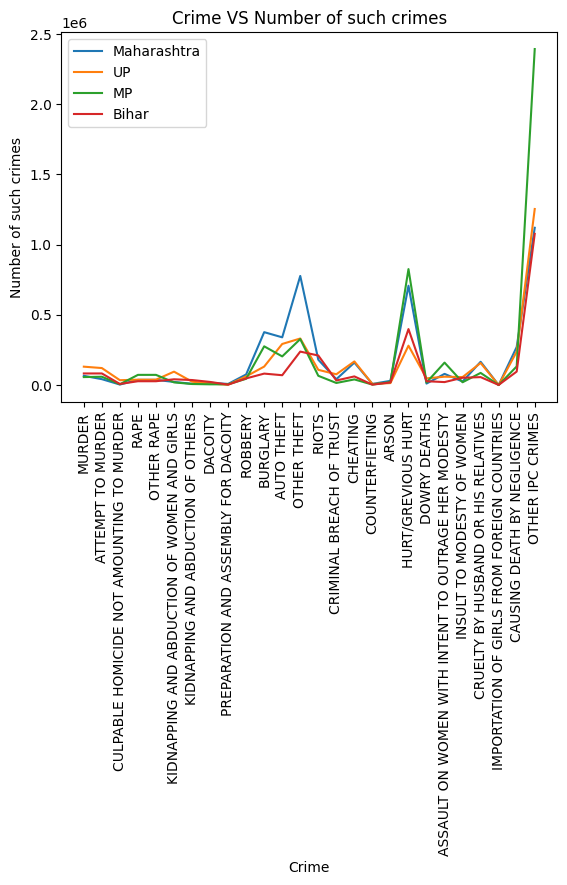

In [89]:
maharashtra = []
up = []
mp = []
bihar = []

mh_index = states.index("MAHARASHTRA")
up_index = states.index("UTTAR PRADESH")
mp_index = states.index("MADHYA PRADESH")
bihar_index = states.index("BIHAR")

for i in attributes:
    maharashtra.append(i[mh_index])
    up.append(i[up_index])
    mp.append(i[mp_index])
    bihar.append(i[bihar_index])

for i in [maharashtra, up, mp, bihar]:
    plt.plot(data1.columns[3:], np.array(i))
plt.xlabel(f"Crime")
plt.ylabel(f"Number of such crimes")
plt.title(f"Crime VS Number of such crimes")
plt.legend(['Maharashtra', 'UP', 'MP', 'Bihar'])
plt.xticks(rotation=90)
plt.show()

## Observations:
- Using line graphs, we can clearly see how all the 4 states are differing in terms of each crime.
-  Crimes like Murders, Attempts to murder, Rapes, kidnapping, dacoity, riots, cheating, counterfeiting, assaults and insults on women, and other crimes are occuring at similar rates in all the 4 states
- Robberies, Burglaries and Thefts are comparatively higher in Maharashtra followed by Madhya Pradesh, Uttar Pradesh and Bihar respectively
- Arson is majorly high in Madhya Pradesh followed by Maharashtra, Bihar and Uttar Pradesh respectively
- Overall, the ratio of all crimes are almost same as the shapes of lines are almost same for all the 4 states


Scatter Plots

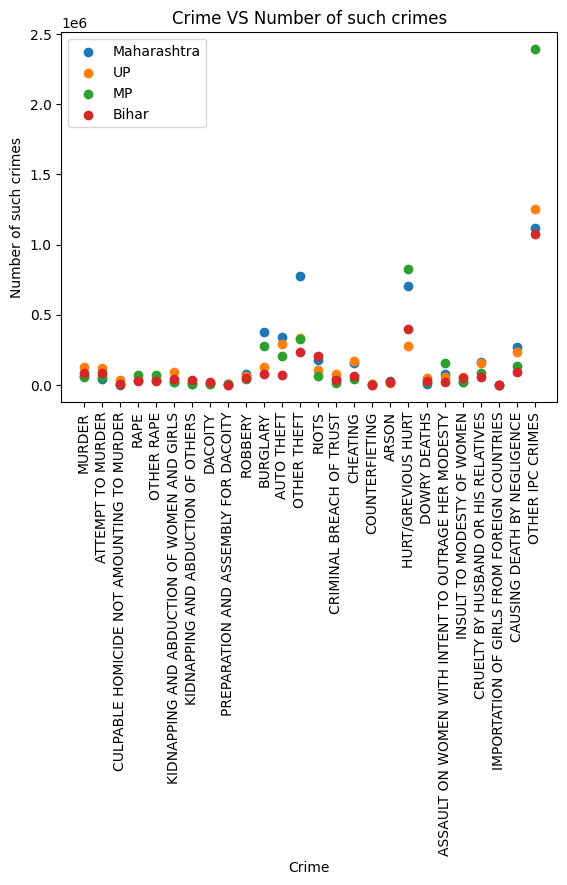

In [90]:
for i in [maharashtra, up, mp, bihar]:
    plt.scatter(data1.columns[3:], np.array(i))
plt.xlabel(f"Crime")
plt.ylabel(f"Number of such crimes")
plt.title(f"Crime VS Number of such crimes")
plt.legend(['Maharashtra', 'UP', 'MP', 'Bihar'])
plt.xticks(rotation=90)
plt.show()

## Observations:
- Conclusions from scatter plots and line graphs should be same.
- It can be seen that even here, the dots of scatter plots in most places are coinciding with each other, implying that the crime rates for some crimes like murders, attempt to murders, rapes, kidnapping, dacoity, etc are almost same in all 4 states.


Box - Whisker Plots

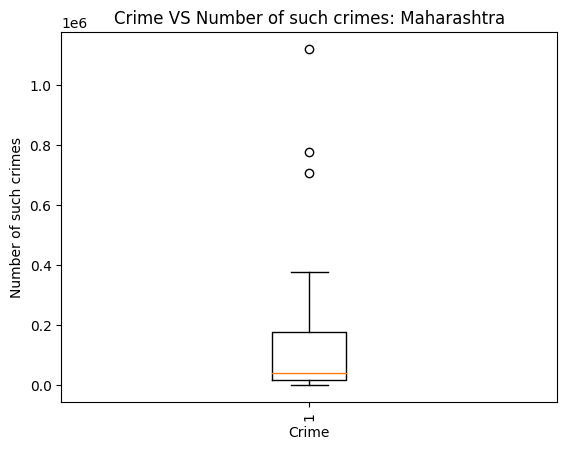

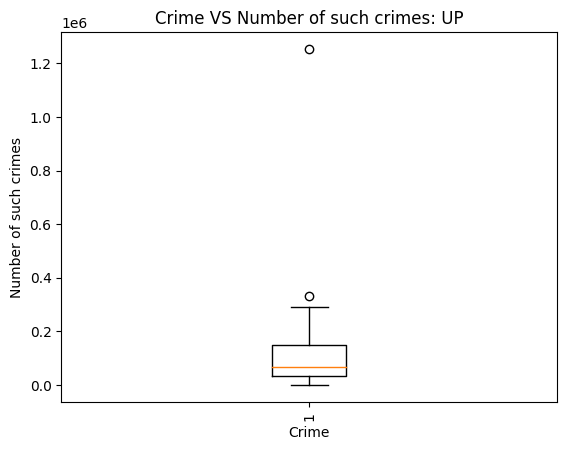

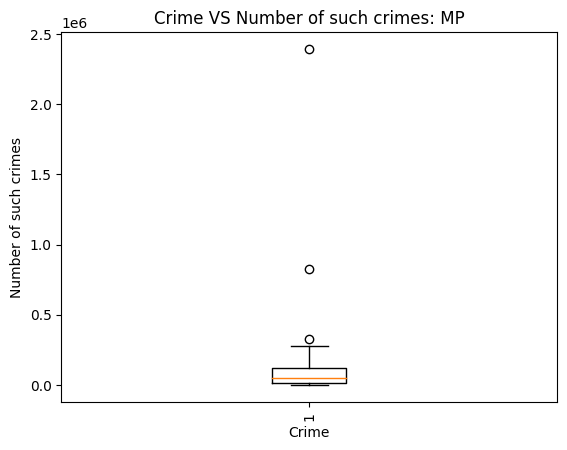

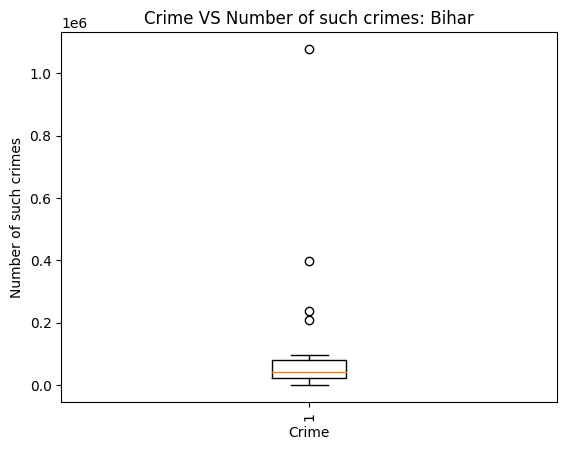

In [98]:
s = ['Maharashtra', 'UP', 'MP', 'Bihar']
cnt = 0
for i in [maharashtra, up, mp, bihar]:
    plt.boxplot(i)
    plt.xlabel(f"Crime")
    plt.ylabel(f"Number of such crimes")
    plt.title(f"Crime VS Number of such crimes: {s[cnt]}")
    cnt += 1
    plt.xticks(rotation=90)
    plt.show()
    

## Observations:
**1. Maharashtra**
- It can be noticed that the crimes in Maharashtra are varying very much w.r.t each other as the median or 2nd quartile is towards the bottom, we can say that various crimes happen at totally unrelated rates in Maharashtra
- As the data is right skewed, it can also be said that the minimum number of each crimes that occurs in Maharashtra is less
- The data has 3 outliers on the top, which implies that three types of crimes happen at a very high rate when compared to others in Maharashtra


**2. Uttar Pradesh**
- It can be noticed that the crimes in Uttar Pradesh are varying very much w.r.t each other as the median or 2nd quartile is towards the bottom, we can say that various crimes happen at totally unrelated rates in Uttar Pradesh
- As the data is right skewed, it can also be said that the minimum number of each crimes that occurs in Uttar Pradesh is less
- The data has 1 outlier on the top, which implies that one type of crime happens at a very high rate when compared to others in Uttar Pradesh

**3. Madhya Pradesh**
- It can be noticed that the crimes in Madhya Pradesh are not varying very much w.r.t each other.
- All the three quartiles, Q1, Q2, Q3 are not scattered and are very close to each other, implying that the number of occurrences of each crime is not that much varied from the number of occurrences of other crimes. 
- The number of occurrences of each crime are closer, implying that all the crimes can be related. It is also optimum to conclude that all the crimes are committed by the same or closely related set of people as the crime numbers are almost the same.
- Data is not much skewed
- The data has 3 outliers on the top, where one outlier is a little close to the whisker, another outlier is slightly far away from the top whisker and another outlier is very far away from the top whisker. This means that one of the crime occurs slightly higher than than the other crimes, another occurs at a much higher rate than other crimes and one crime occurs at very very high rates when compared to other crimes

**4. Bihar**
- It can be noticed that the crimes in Bihar are not varying very much w.r.t each other.
- All the three quartiles, Q1, Q2, Q3 are not scattered and are very close to each other, implying that the number of occurrences of each crime is not that much varied from the number of occurrences of other crimes. 
- The number of occurrences of each crime are closer, implying that all the crimes can be related. It is also optimum to conclude that all the crimes are committed by the same or closely related set of people as the crime numbers are almost the same.
- Data is not much skewed
- The data has 4 outliers on the top, where two outliers are a little close to the whisker, another outlier is slightly far away from the top whisker and another outlier is very far away from the top whisker. This means that two of the crimes occur slightly higher than than the other crimes, another occurs at a much higher rate than other crimes and one crime occurs at very very high rates when compared to other crimes

Violin Plots

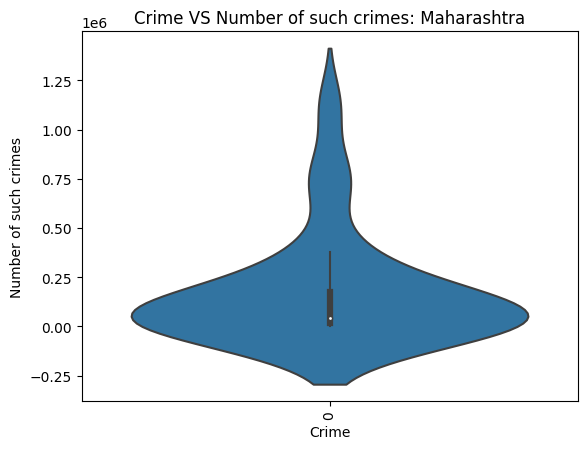

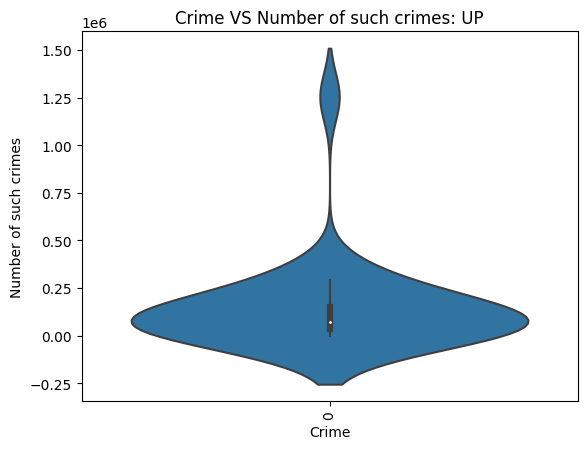

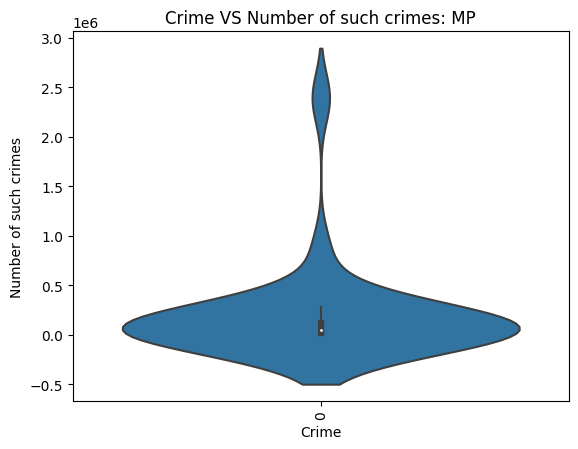

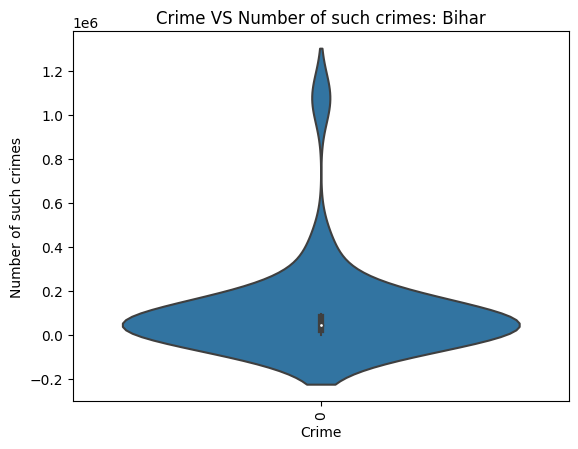

In [101]:
cnt = 0
for i in [maharashtra, up, mp, bihar]:
    sns.violinplot(i)
    plt.xlabel(f"Crime")
    plt.ylabel(f"Number of such crimes")
    plt.title(f"Crime VS Number of such crimes: {s[cnt]}")
    cnt += 1
    plt.xticks(rotation=90)
    plt.show()

## Observations:
- Violin plots are an improvement over box plots and they also show the density (here, magnitude) variation of the values.
- By noticing the violin plots of each state parallely, we can conclude that UP, MP and Bihar have a similar distribution of crimes, whereas, Maharashtra has a good spread of crimes varying from Theft to Other IPC Crimes
- It can also be noticed here too that the crime ratios are same for all 4 states as the shapes of violin plots are almost similar


Radar Chart

In [108]:
categories = data1.columns[[3, 4, 5, 6, 7, 8, 9, 10]]

print("Radar Chart")
fig = go.Figure()
plt.Figure(figsize =(5, 3))

fig.add_trace(go.Scatterpolar(r=maharashtra, theta=categories, fill='toself', name='maharashtra'))
fig.add_trace(go.Scatterpolar(r=up, theta=categories, fill='toself', name='up'))
fig.add_trace(go.Scatterpolar(r=mp, theta=categories, fill='toself', name='mp'))
fig.add_trace(go.Scatterpolar(r=bihar, theta=categories, fill='toself', name='bihar'))

fig.update_layout(autosize=False, width=400, height=400)

fig.show()



Radar Chart


## Observations:
- The above radar chart is for some attributes, like murder, attempt to murder, etc.
- It is clear from this that in those attributes, states Maharashtra, UP, and Bihar have similar ratios of crimes and MP has a rather different and high rates of rapes when compared to other 3 states
- The parameters can be changed and more such conclusions can be made about the crimes


Funnel Chart

In [76]:
# Data as a dictionary
arr = []
for i in data1.columns[3:]:
    arr.append(math.ceil(statistics.mean(data1[i])))
    
data = dict(time=arr,
            steps=data1.columns[3:])

fig = px.funnel(data, x='time', y='steps')
fig.show()

## Observations:
- From the given funnel chart, we can see that Other IPC crimes are the majorly occurring crimes in India followed by crimes due to hurt, thefts and burglaries respectively

Pareto Chart

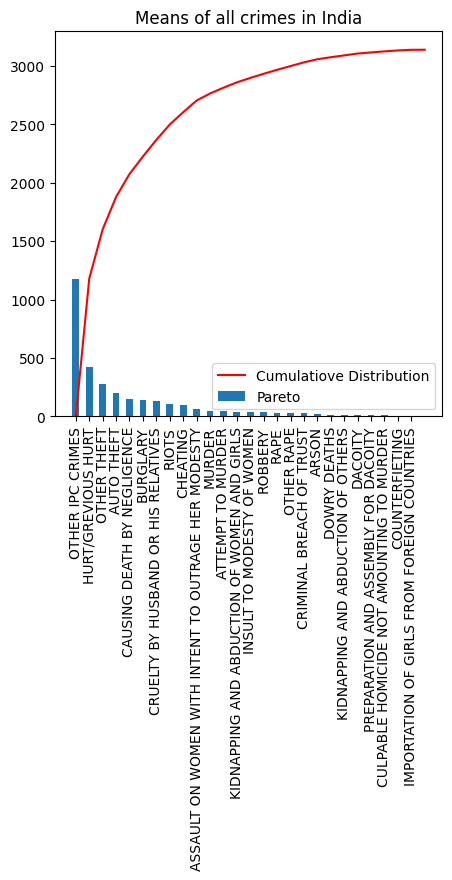

In [111]:
# Pareto Chart - Bar Chart in ascending/descending order
fig = plt.figure(figsize = (5, 5))

plott = []
for i in range(len(attributes)):
#     plott.append([statistics.mean(data1[data1.columns[i+3]]), i])
    plott.append([statistics.mean(data1[data1.columns[i+3]]), i])

# plott = [plott[0][0],plott[1][0], plott[2][0], plott[3][0], plott[4][0]]
plottt = []
label = []

plott.sort(reverse = True)

# print(plott)

for i in range(len(plott)):
    plottt.append(plott[i][0])
    label.append(data1.columns[plott[i][1] + 3])

plott = plottt

cumulative = []
cumulative.append(0)
for i in range(len(plott)):
    if(i == 0):
        cumulative.append(plott[0])
    else:
        cumulative.append(cumulative[i] + plott[i])
    
    
# creating the bar plot
plt.bar(label, plott, width = 0.5)
# Cumulative Plot
plt.plot(cumulative, color = "red")

# plt.xlabel("Species")
# plt.ylabel("Cms")
plt.title(f"Means of all crimes in India")
plt.legend([ "Cumulatiove Distribution","Pareto"])
plt.xticks(rotation = 90)
plt.show()

## Observations:
- From the given Pareto Chart, we can conclude that, Other IPC Crimes occur the most, followed by Hurtful Crimes, theft based crimes, crimes due to negligence and so on.
- In summation around 3000+ crimes occur every year in India


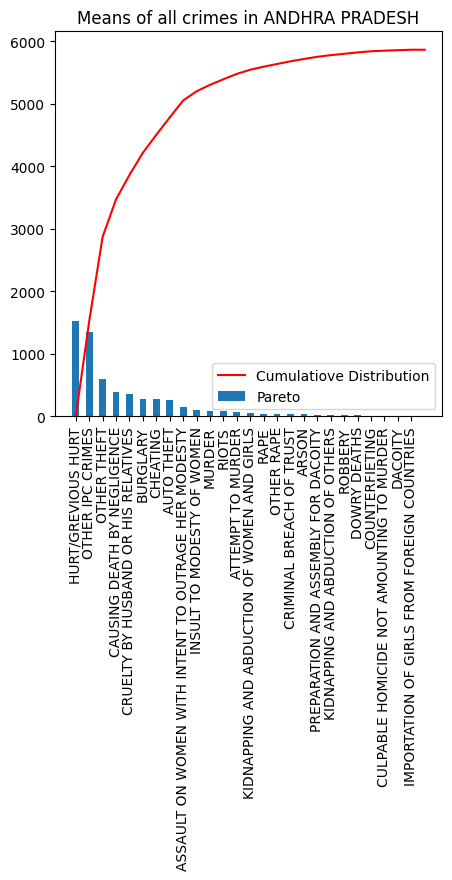

In [113]:
def pareto_state_wise(state):
    fig = plt.figure(figsize = (5, 5))
#     dataa = data1.query(f'STATE/UT == {state}')
    delete = []
    for i in data1.index:
        if data1["STATE/UT"][i] != state:
            delete.append(i)
    dataaa = data1
    dataa = dataaa.drop(delete)
#     print(dataa)
    plott = []
    for i in range(len(attributes)):
    #     plott.append([statistics.mean(data1[data1.columns[i+3]]), i])
        plott.append([statistics.mean(dataa[dataa.columns[i+3]]), i])

    # plott = [plott[0][0],plott[1][0], plott[2][0], plott[3][0], plott[4][0]]
    plottt = []
    label = []

    plott.sort(reverse = True)

    # print(plott)

    for i in range(len(plott)):
        plottt.append(plott[i][0])
        label.append(dataa.columns[plott[i][1] + 3])

    plott = plottt

    cumulative = []
    cumulative.append(0)
    for i in range(len(plott)):
        if(i == 0):
            cumulative.append(plott[0])
        else:
            cumulative.append(cumulative[i] + plott[i])
    
    # creating the bar plot
    plt.bar(label, plott, width = 0.5)
    # Cumulative Plot
    plt.plot(cumulative, color = "red")

    plt.title(f"Means of all crimes in {state}")
    plt.legend([ "Cumulatiove Distribution","Pareto"])
    plt.xticks(rotation = 90)
    plt.show()  
    return


string = "ANDHRA PRADESH"
pareto_state_wise(string)

## Observations:
- It can be seen that in Andhra Pradesh, hurt induced crimes occur the most, followed by other IPC crimes, theft and so on.
- Average crime rate goes upto 6000 which is way more than the overall India’s average (around 3000). This implies that Andhra Pradesh is a state prone to crimes


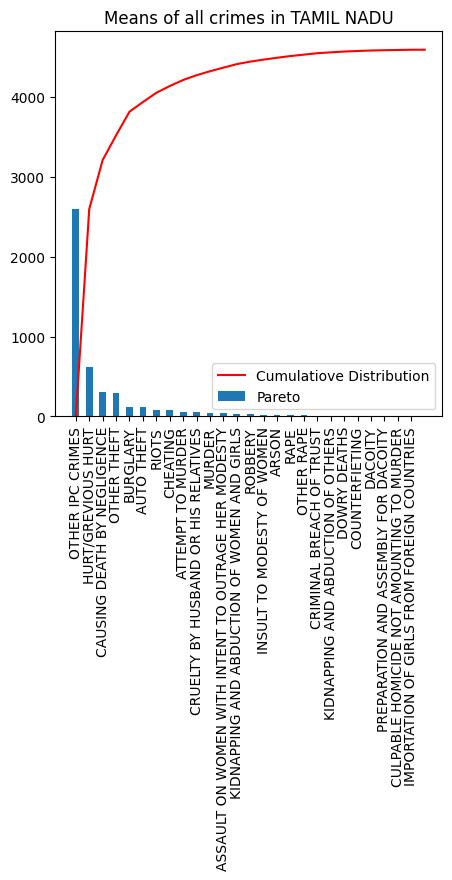

In [114]:
string = "TAMIL NADU"
pareto_state_wise(string)

## Observations:
- It can be seen that in Tamil Nadu, other IPC crimes occur the most, followed by hurt crimes, Crimes due to negligence and so on.
- Average crime rate goes upto 4000 which is way more than the overall India’s average (around 3000). This implies that Tamil Nadu is a state slightly more prone to crimes


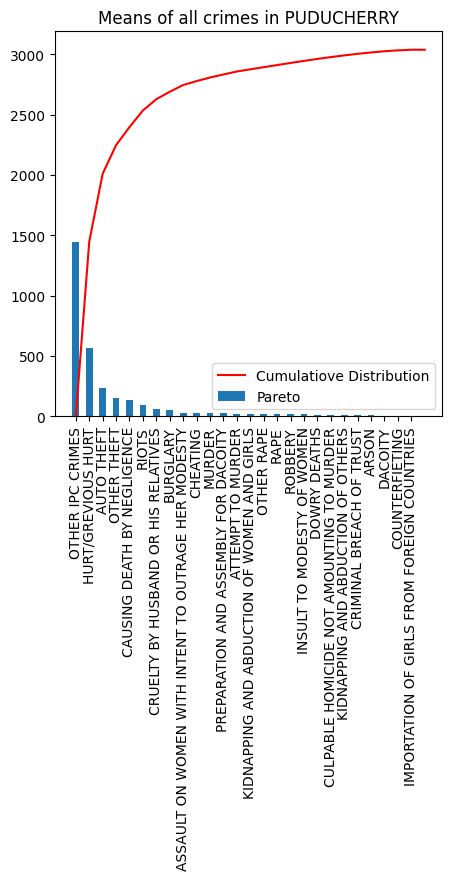

In [117]:
string = "PUDUCHERRY"
pareto_state_wise(string)